# Project: Prediction of online shopper intention 
Prediction of purchasing intention online shopper using machine learning models. 

### Objectives
The main goals of this project is to 

1. Classify whether an online customer will generate a revenue or not, based on user activity and characteristics. 

1. What are the major session or user features that drive the shopper intention. 

To achieve this goal and better understand the data of shopper and non shopper, this project will initially conduct exploratory analysis to understand the characteristics of a shopper and non shopper.

This project will utilize the following models and select the best performing model to implementation. 

- Classification models: logit, svm 
              
- Instance based - kNN
   


In [1]:
#import the libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.metrics import classification_report, confusion_matrix ,plot_confusion_matrix , roc_curve,auc,balanced_accuracy_score,cohen_kappa_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [2]:
shopper=pd.read_csv('C:\\Users\\Tressy\\Desktop\\Semester 3\\Pred Analysis\\Datasets\\online_shoppers_intention.csv',
                    encoding="utf8")
shopper.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Dataset
 Dataset from UCI ML repository https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
 
 The dataset consists of 10 numerical and 8 categorical attributes.
 
 The 'Revenue' attribute is used as the class label. It has 2 classes indicating 
 
- TRUE  = Revenue Generated and 
- FALSE = No Revenue Generated.  

In [3]:
shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Data Field description for numerical attributes**

**Administrative**: Number of pages visited by the visitor about account management 

**Administrative duration**:Total amount of time (in seconds) spent by the visitor on account management related
pages 

**Informational**: Number of pages visited by the visitor about Web site, communication and address information of the shopping site

**Informational duration**: Total amount of time (in seconds) spent by the visitor on informational pages 

**Product related**: Number of pages visited by visitor about product related pages 

**Product related duration**: Total amount of time (in seconds) spent by the visitor on product related pages 

**Bounce rate**: Average bounce rate value of the pages visited by the visitor (percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session.)

**Exit rate**: Average exit rate value of the pages visited by the visitor ( for all pageviews to the page, the percentage that were the last in the session. This is the number of exits from the website.)

**Page value**: Average page value of the pages visited by the visitor (average value for a web page that a user visited before completing an e-commerce transaction. It tells you which specific pages of the site offer the most value)

**Special day**: Closeness of the site visiting time to a special day in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

**Change the variable type for categorical/boolean variables to numeric below.**

**OperatingSystems**:  Operating system of the visitor  

**Browser**: Browser of the visitor  

**Region**: Geographic region from which the session has been started by the visitor 

**TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct) 

**VisitorType**: Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’  

**Weekend**: Boolean value indicating whether the date of the visit is weekend  

**Month**: Month value of the visit date  

------------------------------------------------------------Target Variable----------------------------------------------------

**Revenue**: Class label indicating whether the visit has been finalized with a transaction 

In [4]:
nom_attr=list(shopper)[10:18]
num_attr=list(shopper)[0:9]
print("Numerical attributes in the dataset",num_attr)
print("Nominal attributes in the dataset",nom_attr)

Numerical attributes in the dataset ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
Nominal attributes in the dataset ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [5]:
shopper[['Month']]=pd.Categorical(shopper.Month)
shopper[['Month']]=shopper.Month.cat.codes
shopper[['VisitorType']]=pd.Categorical(shopper.VisitorType)
shopper[['VisitorType']]=shopper.VisitorType.cat.codes

shopper[nom_attr]=shopper[nom_attr].astype(int,copy=False) 
shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int32  
 12  Browser                  12330 non-null  int32  
 13  Region                   12330 non-null  int32  
 14  TrafficType           

### Step 1: Data Understanding
  
There are 12330 entries and total 18 columns. The data is imbalanced as 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping. 
 
The statistical summary of the numerical variables are evaluated to see the distribution of values.  
 
|Feature   | mean	| std	| min	| max
 ----------|--------|-------|-------|----
|Administrative|	2.315166|	3.321784|	0.0|	27.000000
|Administrative_Duration|	80.818611|	176.779107|	0.0|	3398.750000
|Informational|	0.503569|	1.270156|	0.0|	24.000000
|Informational_Duration|	34.472398|	140.749294|	0.0|	2549.375000
|ProductRelated|	31.731468|	44.475503|	0.0|	705.000000
|ProductRelated_Duration|	1194.746220|	1913.669288|	0.0|	63973.522230
|BounceRates|	0.022191|	0.048488|	0.0|	0.200000
|ExitRates|	0.043073|	0.048597|	0.0|	0.200000
|PageValues|	5.889258|	18.568437|	0.0|	361.763742
|SpecialDay|	0.061427|	0.198917|	0.0|	1.000000


 The independent attributes are identified to be highly positively skewed. The kurtosis values indicates that all the independent variables' distribution is highly peaked.Due to these reasons, the distribution is considered nonnormal. Anderson-Darling Test for normality is conducted to confirm this and the results reassures this observation.
  
The distribution of categorical variables are understood.

|Feature   |  No:of distinct values
 ----------|--------
|Month| 10
|OperatingSystems|8
|Browser| 13
|Region|9
|TrafficType|20
|VisitorType|3
|Weekend|2

The revenue generation based on the 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend' are identified. During the year, most shoppers visited the site in the month of May, contributing 27% of site traffic, followed by November with 24%. February marked the least number of visitors with about 1.5%. But its during November that most conversions to revenue recorded. While only 14% of returning users made a purchase, 25% of new users who visited the site ended up with purchase. While 15% of weekday hits generated revenue,it is about 17% for weekend. 
 


In [6]:
shopper.describe().loc[['mean','std','min','max']].transpose()

,mean,std,min,max
Administrative,2.315166,3.321784,0.0,27.000000
Administrative_Duration,80.818611,176.779107,0.0,3398.750000
Informational,0.503569,1.270156,0.0,24.000000
Informational_Duration,34.472398,140.749294,0.0,2549.375000
ProductRelated,31.731468,44.475503,0.0,705.000000
ProductRelated_Duration,1194.746220,1913.669288,0.0,63973.522230
BounceRates,0.022191,0.048488,0.0,0.200000
ExitRates,0.043073,0.048597,0.0,0.200000
PageValues,5.889258,18.568437,0.0,361.763742
SpecialDay,0.061427,0.198917,0.0,1.000000


**Data Distribution**

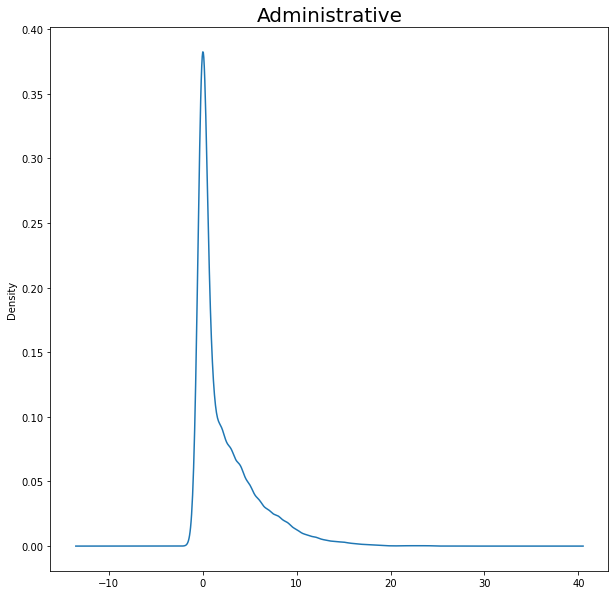

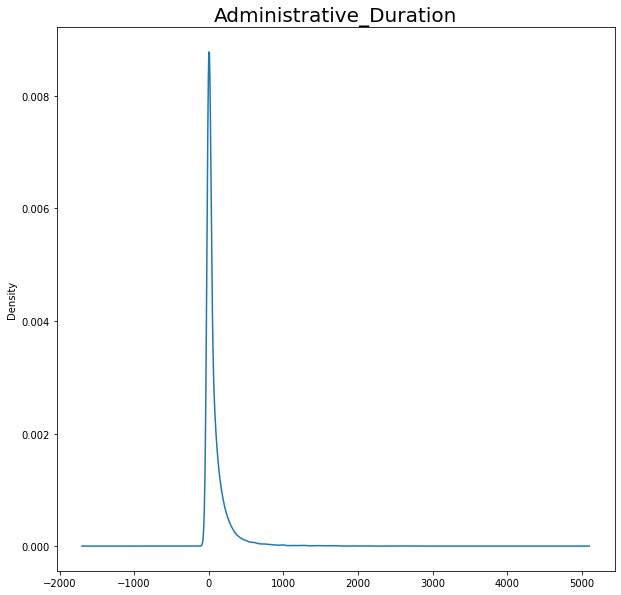

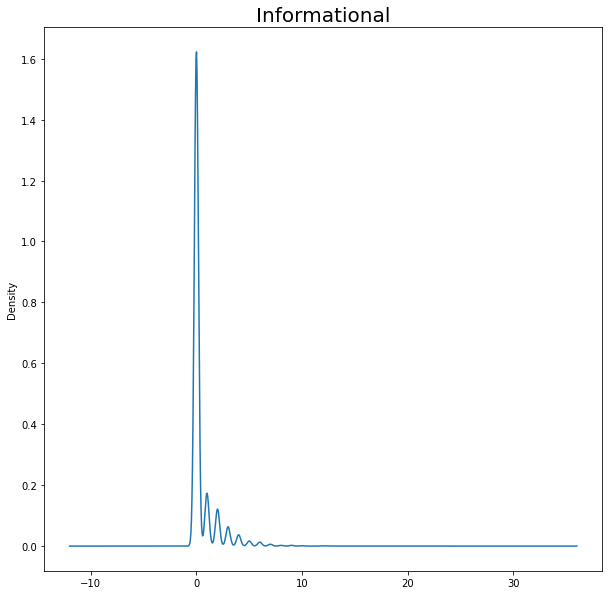

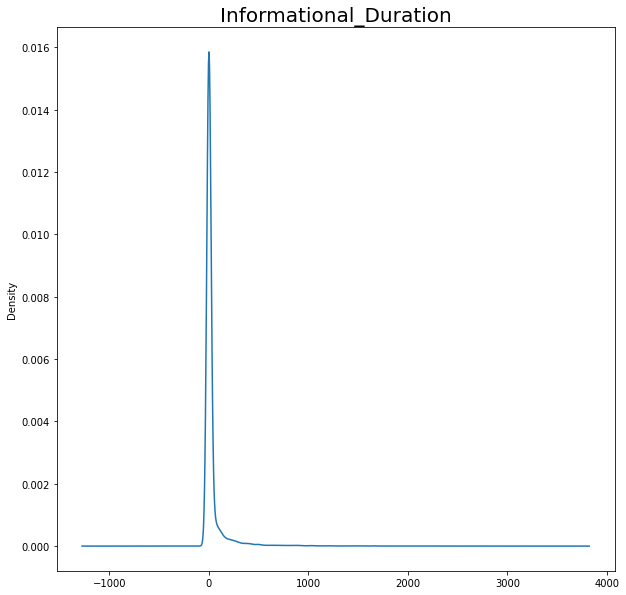

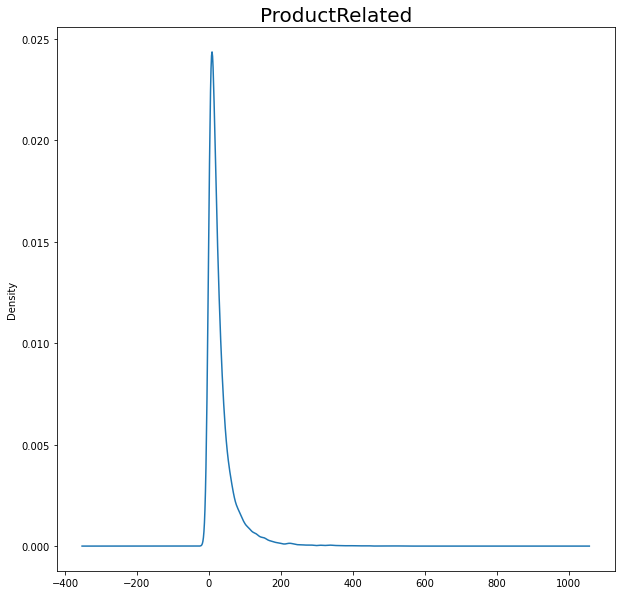

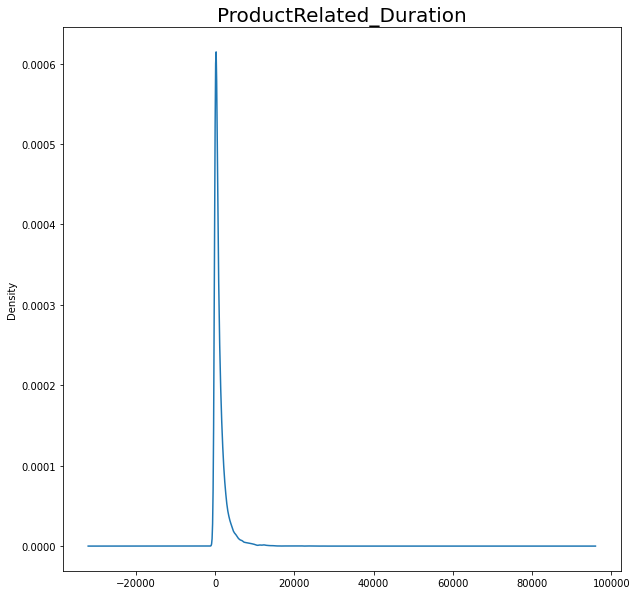

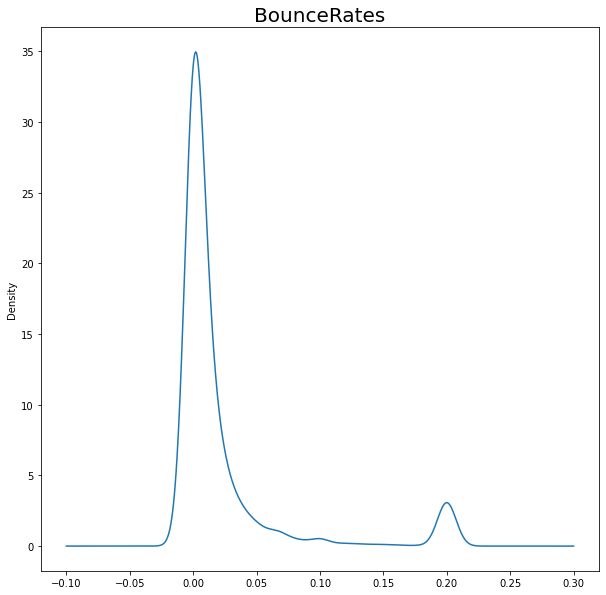

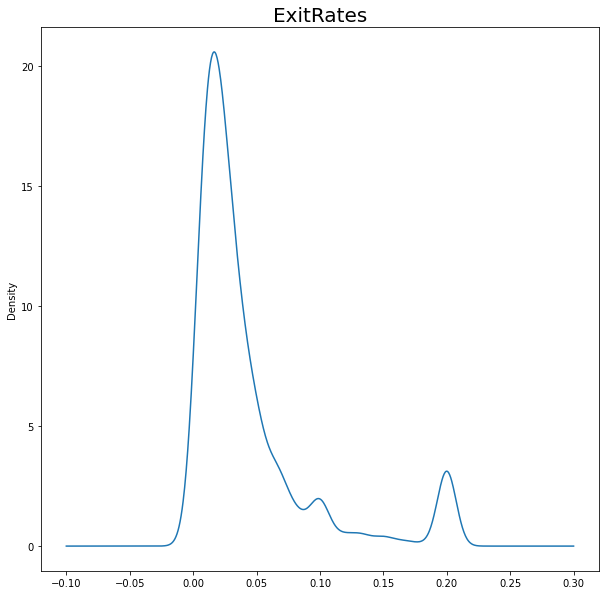

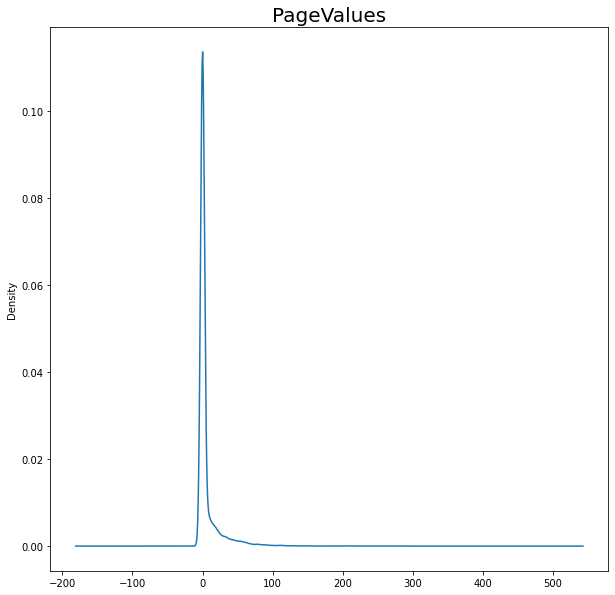

In [7]:
for i in num_attr:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax=shopper[i].plot.kde()
    ax.axes.set_title(i,fontsize=20)
    plt.show()

#### Check Normality, shewness and Kurtosis

##### Anderson-Darling Test for normality. Null hypothesis=population is normally distributed. if the calculated test statistic is less than the critical value at a chosen significance level then data is normal.

In [8]:
from scipy.stats import anderson
for i in num_attr:
    res = anderson(shopper[i])
    ix=len(res.critical_values)-1
    if res.statistic < res.critical_values[ix]:
        print('Data is normal-fail to reject H0')
    else:
        print('Data is not normal -reject H0')

Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0
Data is not normal -reject H0


In [9]:
shopper.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
Month                     -0.832535
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
VisitorType               -2.065135
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [10]:
shopper.kurtosis()

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
Month                       -0.368330
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
VisitorType                  2.295013
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

#### Z-score normalization

In [11]:
#Z-score normalization
shopper_norm=shopper.apply(zscore)
shopper_norm

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,-0.427872
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,-0.427872
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,-0.427872
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,-0.427872
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,-0.427872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,-1.756881,2.058618,2.121412,-0.894178,-0.762629,0.407786,1.816360,-0.427872
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,0.976499,0.407786,1.816360,-0.427872
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,2.218733,0.407786,1.816360,-0.427872
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.061364,1.721839,0.407786,-0.550552,-0.427872


#### Categorical Variable distribution

No:of values in feature:  Month = 10
6    27.283049
7    24.314680
5    15.466342
1    14.006488
8     4.452555
9     3.633414
0     3.511760
3     3.503650
4     2.335766
2     1.492295
Name: Month, dtype: float64


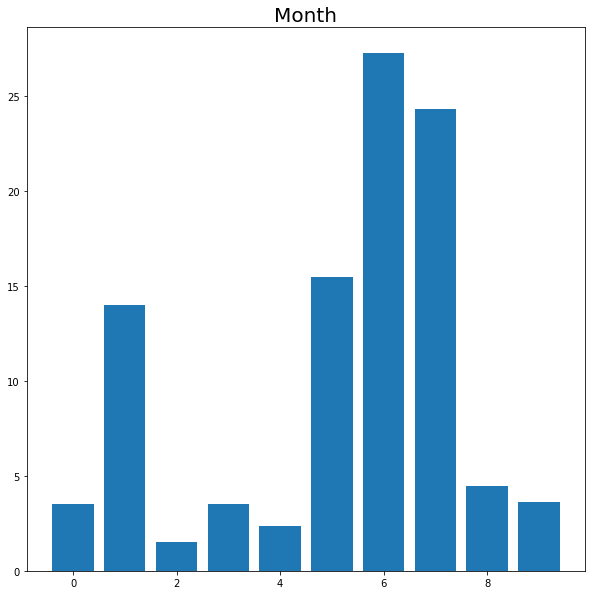

No:of values in feature:  OperatingSystems = 8
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


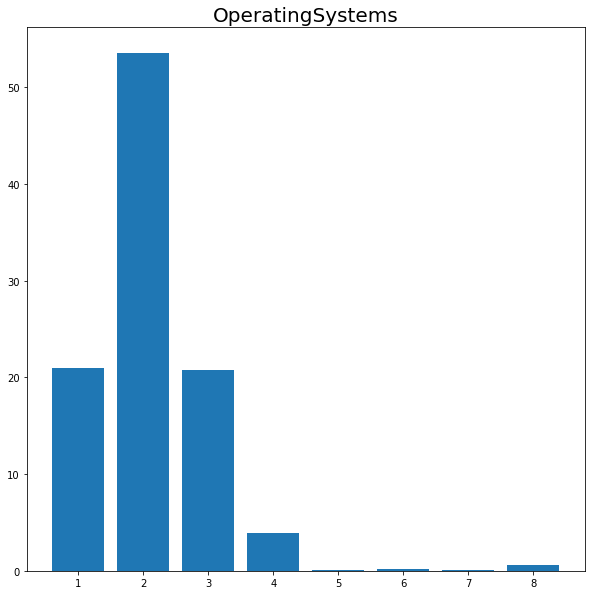

No:of values in feature:  Browser = 13
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


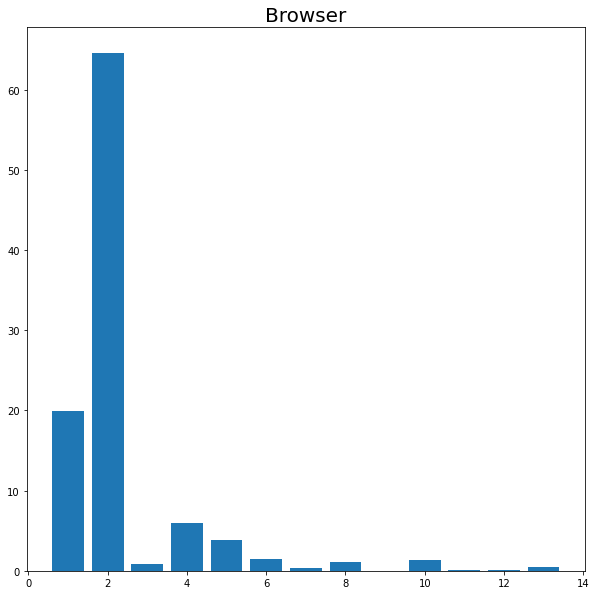

No:of values in feature:  Region = 9
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


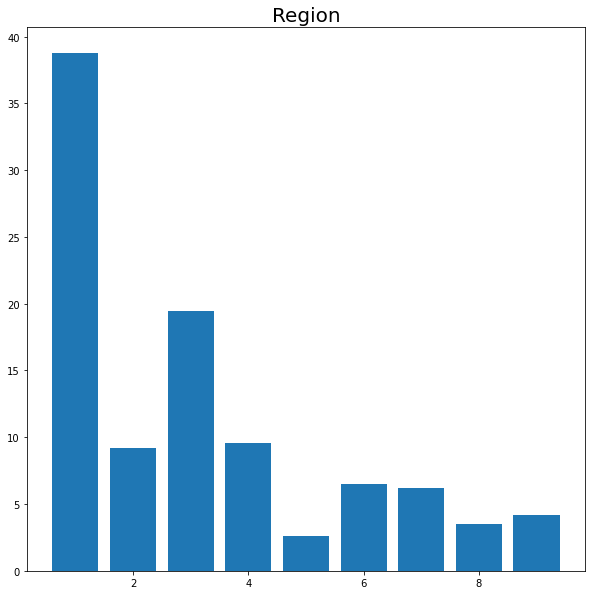

No:of values in feature:  TrafficType = 20
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


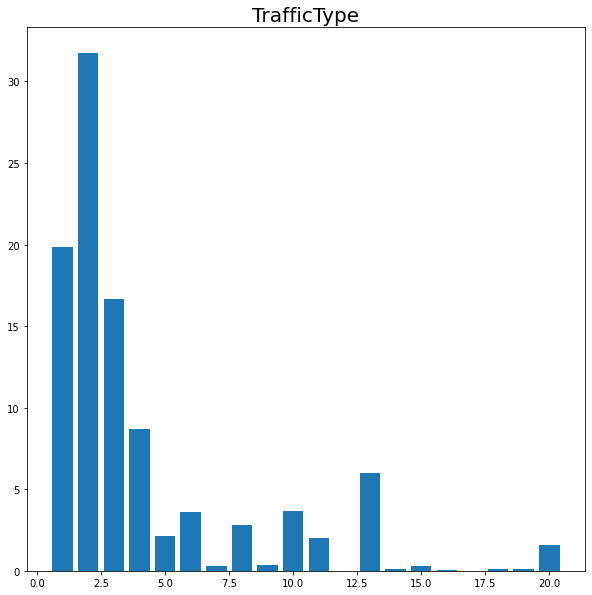

No:of values in feature:  VisitorType = 3
2    85.571776
0    13.738848
1     0.689376
Name: VisitorType, dtype: float64


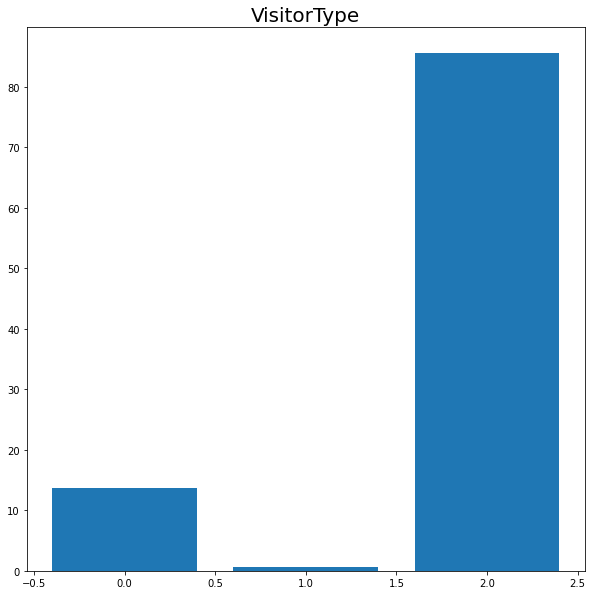

No:of values in feature:  Weekend = 2
0    76.739659
1    23.260341
Name: Weekend, dtype: float64


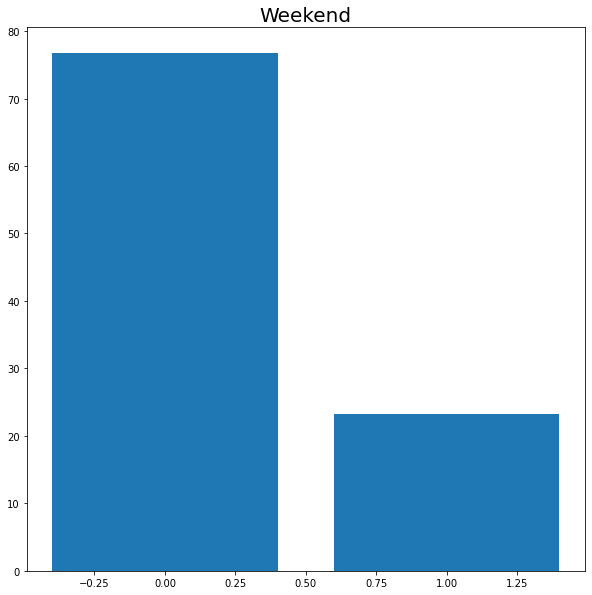

No:of values in feature:  Revenue = 2
0    84.525547
1    15.474453
Name: Revenue, dtype: float64


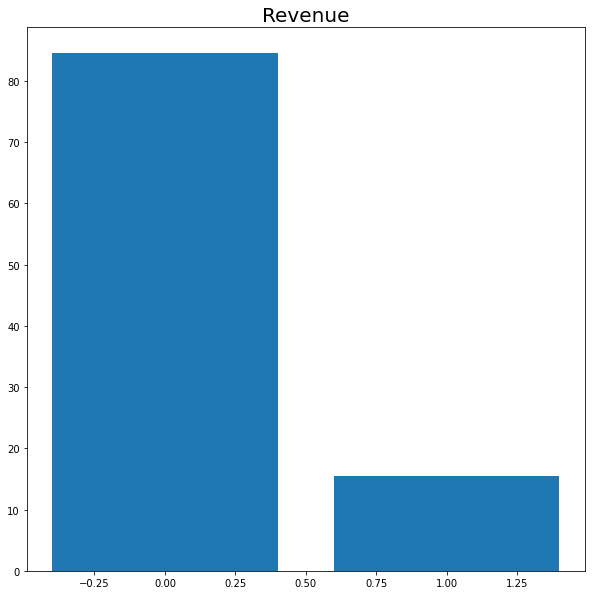

In [12]:
for i in nom_attr:
    print("No:of values in feature: ",i,"=",shopper[i].value_counts().count())
    cat_val_cnt=shopper[i].value_counts()/123.30
    cat_ix=cat_val_cnt.index
    print(cat_val_cnt)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.bar(cat_ix,cat_val_cnt)
    ax.axes.set_title(i,fontsize=20)
    plt.show()
    

Revenue     0    1
Month             
0         357   76
1        1511  216
2         181    3
3         366   66
4         259   29
5        1715  192
6        2999  365
7        2238  760
8         434  115
9         362   86


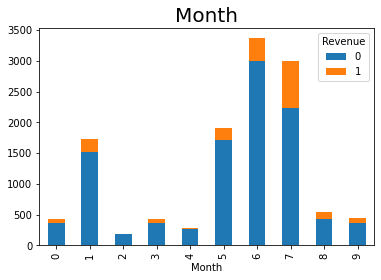

Revenue              0     1
OperatingSystems            
1                 2206   379
2                 5446  1155
3                 2287   268
4                  393    85
5                    5     1
6                   17     2
7                    6     1
8                   62    17


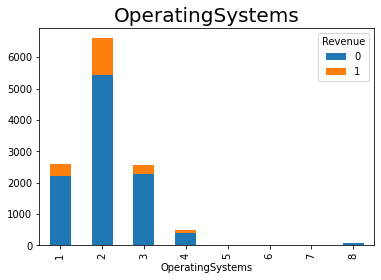

Revenue       0       1
Browser                
1        2097.0   365.0
2        6738.0  1223.0
3         100.0     5.0
4         606.0   130.0
5         381.0    86.0
6         154.0    20.0
7          43.0     6.0
8         114.0    21.0
9           1.0     NaN
10        131.0    32.0
11          5.0     1.0
12          7.0     3.0
13         45.0    16.0


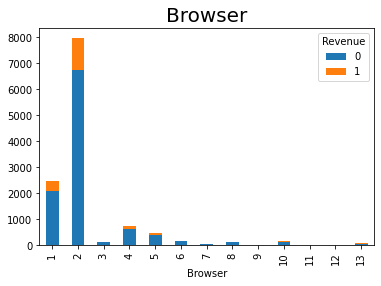

Revenue     0    1
Region            
1        4009  771
2         948  188
3        2054  349
4        1007  175
5         266   52
6         693  112
7         642  119
8         378   56
9         425   86


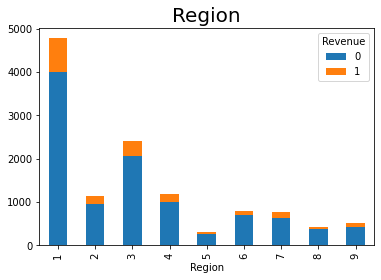

Revenue           0      1
TrafficType               
1            2189.0  262.0
2            3066.0  847.0
3            1872.0  180.0
4             904.0  165.0
5             204.0   56.0
6             391.0   53.0
7              28.0   12.0
8             248.0   95.0
9              38.0    4.0
10            360.0   90.0
11            200.0   47.0
12              1.0    NaN
13            695.0   43.0
14             11.0    2.0
15             38.0    NaN
16              2.0    1.0
17              1.0    NaN
18             10.0    NaN
19             16.0    1.0
20            148.0   50.0


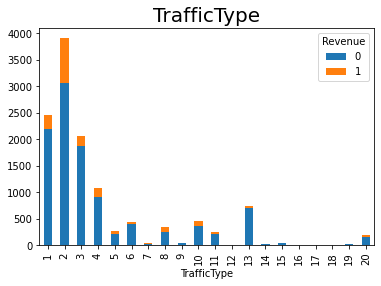

Revenue         0     1
VisitorType            
0            1272   422
1              69    16
2            9081  1470


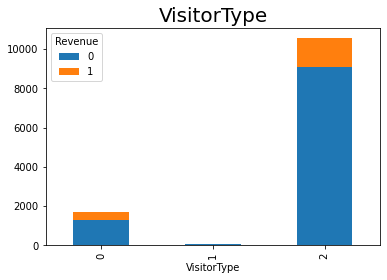

Revenue     0     1
Weekend            
0        8053  1409
1        2369   499


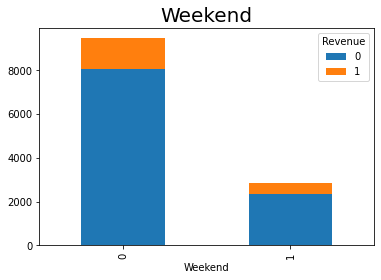

Revenue        0       1
Revenue                 
0        10422.0     NaN
1            NaN  1908.0


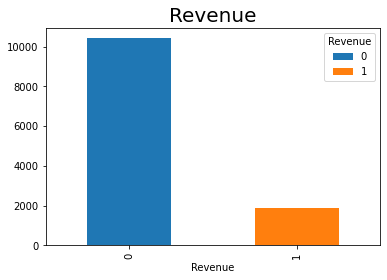

In [13]:
for i in nom_attr:
    shopper_group=shopper.groupby([i,'Revenue'],sort=True)['Revenue'].count().unstack()
    print(shopper_group)
    ax = shopper_group.plot(kind='bar', stacked=True)
    ax.axes.set_title(i,fontsize=20)
    plt.show()

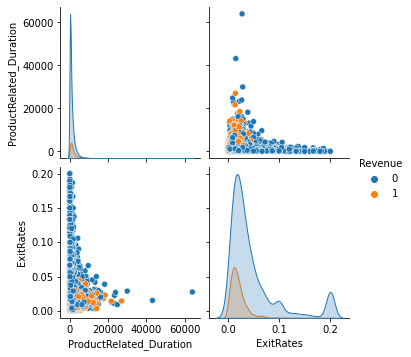

In [14]:
sns.pairplot(shopper[['ProductRelated_Duration','ExitRates','Revenue']],hue='Revenue')

## Step 2: Data Preperation

### Missing Value

There are no missing values identified in this dataset. 

### Outlier detection
 
There seem to be values scattered well beyond the q3+interquartile bounderies. In this context, These seem to be valid values. However, the max values in the below attributes seem to be actual outliers are are removed.

Administrative_Duration - max value row is eliminated
Informational_Duration - max value row is eliminated
ProductRelated_Duration - 2 max value rows are eliminated

The total number of instances is now 12326.

The count of the nominal variables seems as expected and no treatment is done. 

Series([], Name: Administrative, dtype: int64)
248      16
282      13
478      13
502      18
510      14
         ..
11983    14
11988    14
12178    26
12233    13
12244    19
Name: Administrative, Length: 213, dtype: int64


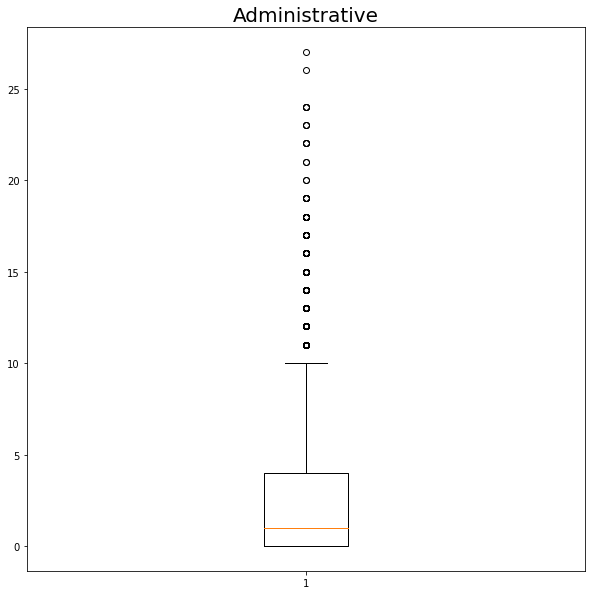

Series([], Name: Administrative_Duration, dtype: float64)
76       1005.666667
109       326.250000
128       462.000000
187       293.778205
191      1226.000000
            ...     
12244     739.194872
12247     311.136111
12265     413.499612
12285     369.333333
12307     305.125000
Name: Administrative_Duration, Length: 883, dtype: float64


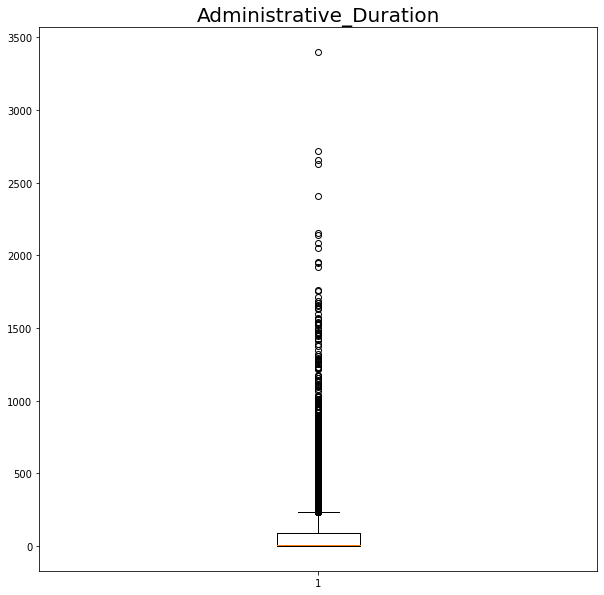

Series([], Name: Informational, dtype: int64)
29       1
57       2
98       1
103      1
106      1
        ..
12307    3
12311    2
12312    1
12313    3
12324    1
Name: Informational, Length: 2631, dtype: int64


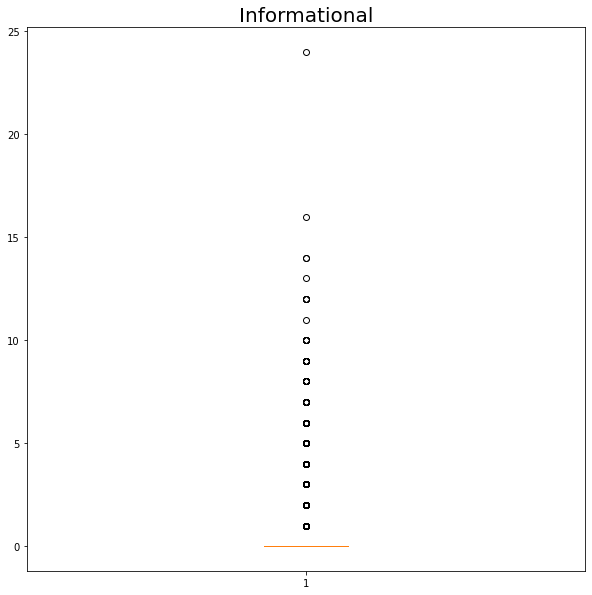

Series([], Name: Informational_Duration, dtype: float64)
57       120.00
103       16.00
109       94.00
114       93.00
122       75.00
          ...  
12295     33.75
12307    368.25
12311    211.25
12312      9.00
12313     86.00
Name: Informational_Duration, Length: 2405, dtype: float64


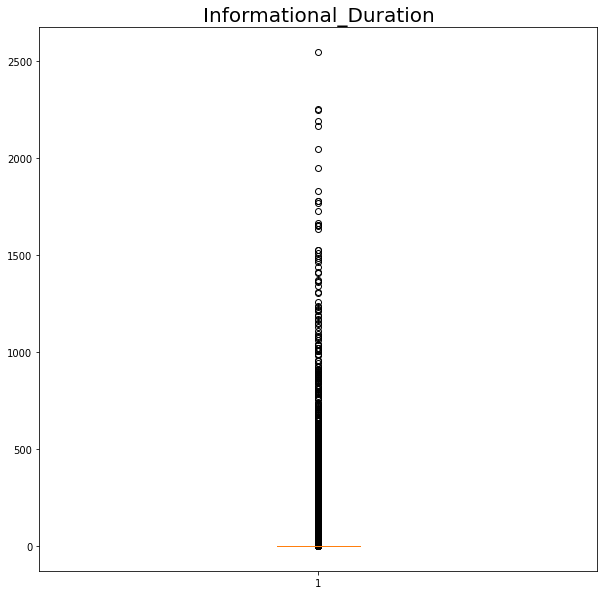

Series([], Name: ProductRelated, dtype: int64)
109      128
367      111
424      149
510      258
611      173
        ... 
12282    125
12285    133
12287    111
12311    144
12312    221
Name: ProductRelated, Length: 723, dtype: int64


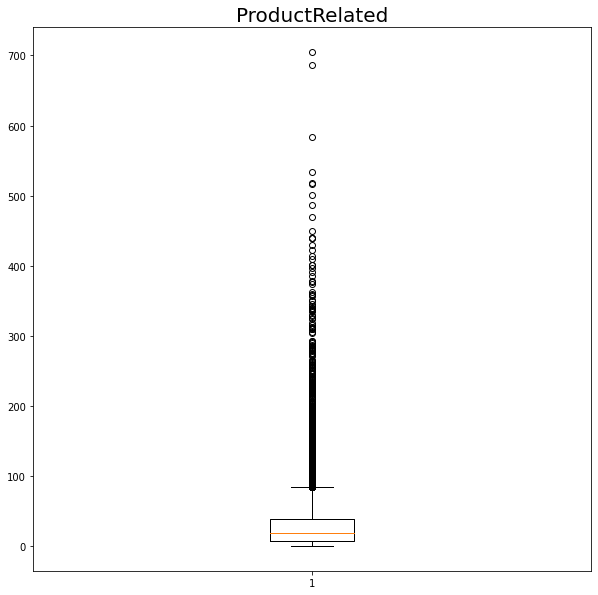

Series([], Name: ProductRelated_Duration, dtype: float64)
40        4084.393939
66        6951.972222
109       5062.213753
251       5188.500000
265       5220.083333
             ...     
12278     4845.989214
12282     7453.766667
12287     6340.152381
12311     4627.489571
12312    11431.001240
Name: ProductRelated_Duration, Length: 711, dtype: float64


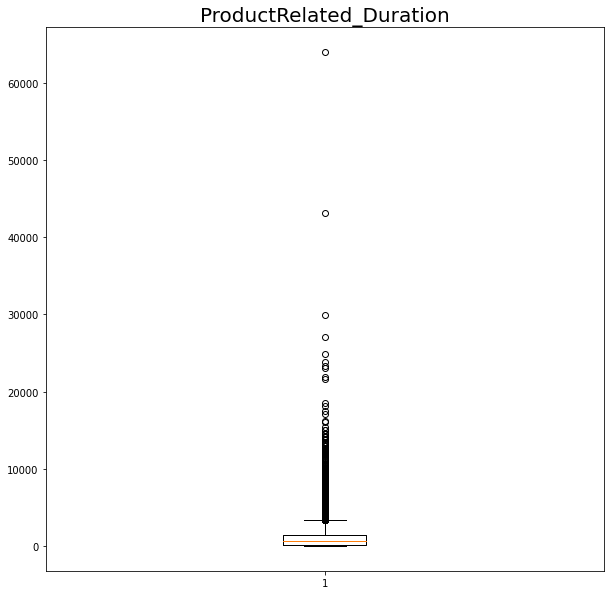

Series([], Name: BounceRates, dtype: float64)
0        0.200000
2        0.200000
6        0.200000
7        0.200000
16       0.200000
           ...   
12290    0.080000
12292    0.075000
12301    0.200000
12321    0.200000
12327    0.083333
Name: BounceRates, Length: 1316, dtype: float64


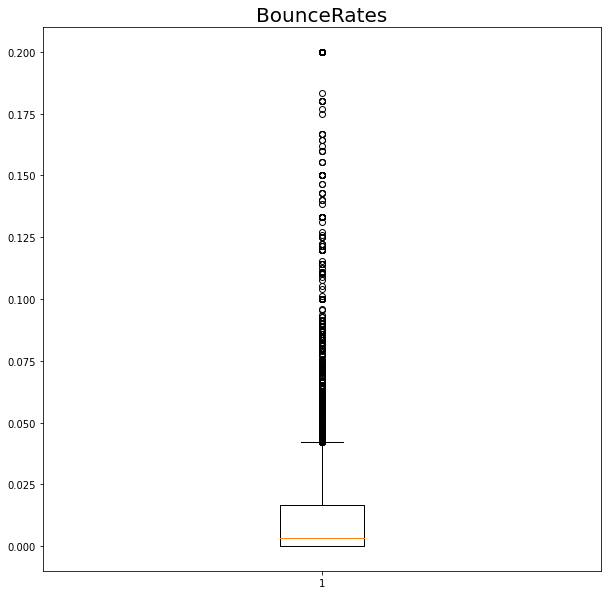

Series([], Name: ExitRates, dtype: float64)
0        0.20
2        0.20
3        0.14
6        0.20
7        0.20
         ... 
12197    0.20
12200    0.20
12220    0.20
12301    0.20
12321    0.20
Name: ExitRates, Length: 989, dtype: float64


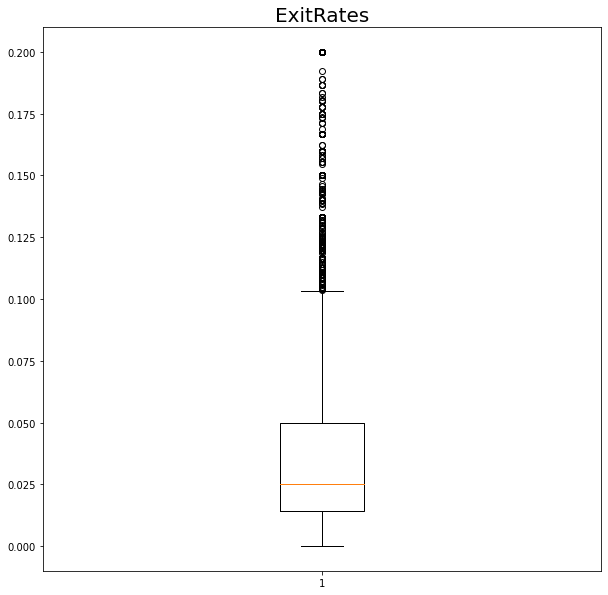

Series([], Name: PageValues, dtype: float64)
29       54.179764
57       19.447079
62       38.308493
65       22.916036
76       11.439412
           ...    
12307    39.519807
12312     1.582473
12313    78.811725
12319     3.685401
12325    12.241717
Name: PageValues, Length: 2730, dtype: float64


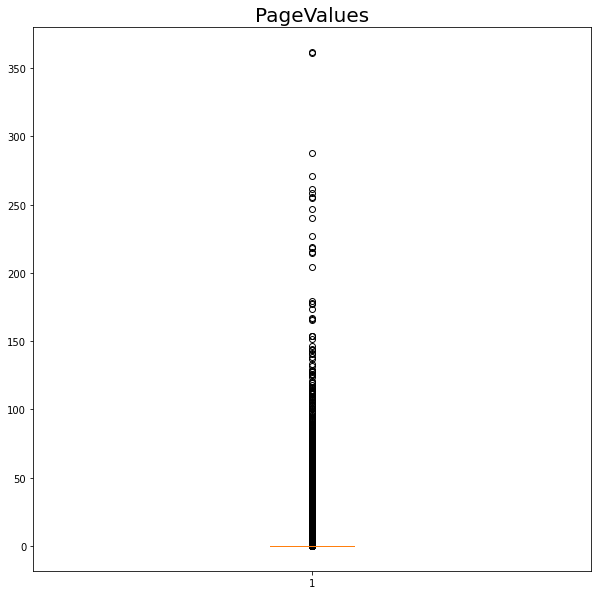

In [15]:
for i in num_attr:
    Q3,Q1=np.percentile(shopper[i],[75,25])
    IQ=Q3-Q1
    LB=Q1-2*IQ
    UB=Q3+2*IQ
    print(shopper[i][shopper[i]<LB])
    print(shopper[i][shopper[i]>UB])
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.boxplot(shopper[i])
    ax.axes.set_title(i,fontsize=20)
    plt.show()

In [16]:
### Outlier removal
#shopper.drop(shopper['Administrative_Duration'].idmax())
shopper=shopper.drop(shopper['Administrative_Duration'].idxmax())
shopper=shopper.drop(shopper['Informational_Duration'].idxmax())
shopper=shopper.drop(shopper['ProductRelated_Duration'].idxmax())
shopper=shopper.drop(shopper['ProductRelated_Duration'].idxmax())
shopper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12326 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12326 non-null  int64  
 1   Administrative_Duration  12326 non-null  float64
 2   Informational            12326 non-null  int64  
 3   Informational_Duration   12326 non-null  float64
 4   ProductRelated           12326 non-null  int64  
 5   ProductRelated_Duration  12326 non-null  float64
 6   BounceRates              12326 non-null  float64
 7   ExitRates                12326 non-null  float64
 8   PageValues               12326 non-null  float64
 9   SpecialDay               12326 non-null  float64
 10  Month                    12326 non-null  int32  
 11  OperatingSystems         12326 non-null  int32  
 12  Browser                  12326 non-null  int32  
 13  Region                   12326 non-null  int32  
 14  TrafficType           

## Step 3: Feature Selection

#### Check Correlation for feature selection: 

<AxesSubplot:>

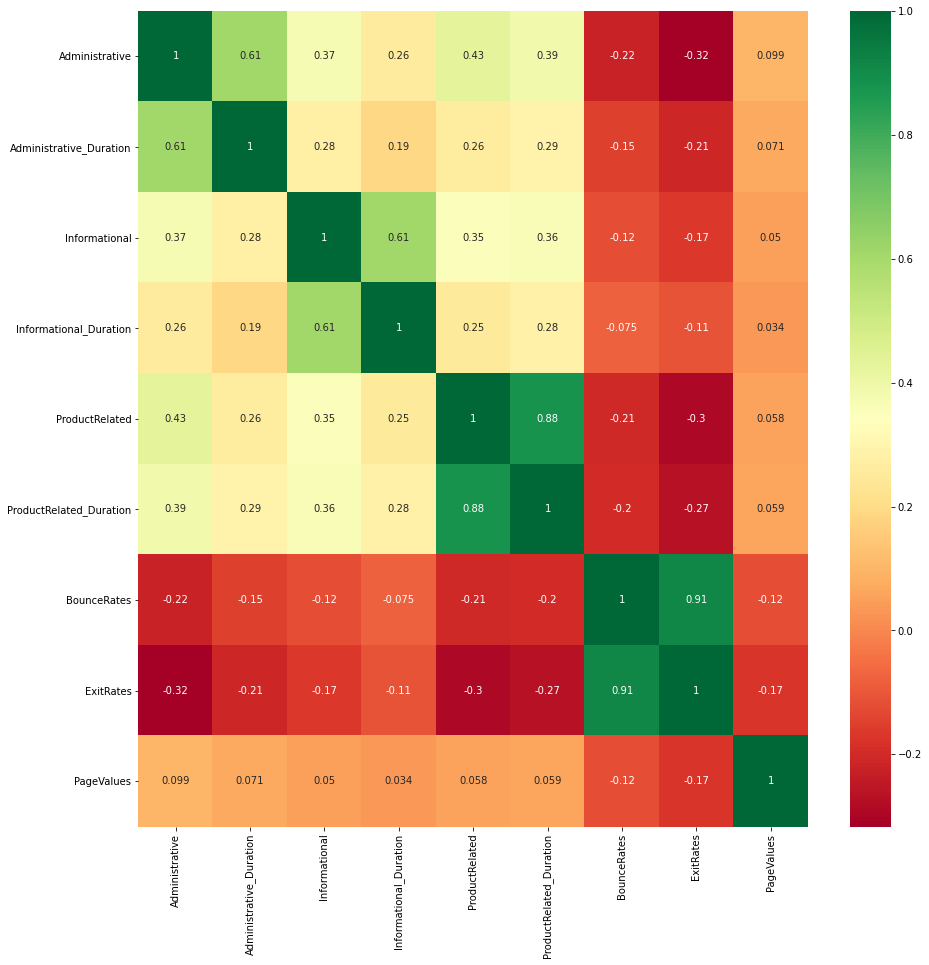

In [17]:
shopper[num_attr].corr()
plt.figure(figsize=(15,15))
sns.heatmap(shopper[num_attr].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(shopper.corr(),annot=True,cmap="RdYlGn")

#### Chi-square test for feature selection: 

Null Hypothesis (H0): Two variables are independent.

Alternate Hypothesis (H1): Two variables are not independent.


If Statistic >= Critical Value: reject null hypothesis (H0), dependent.
If Statistic < Critical Value:  fail to reject null hypothesis (H0), independent.

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
inp=shopper[nom_attr] 
chi_scores=chi2(shopper[nom_attr],shopper['Revenue'])
chi_scores 
 

(array([8.57864294e+01, 1.03984812e+00, 8.85202997e+00, 3.10246263e+00,
        1.24177006e+00, 3.75111561e+01, 8.12431404e+00, 1.04180000e+04]),
 array([2.00457121e-20, 3.07856798e-01, 2.92763107e-03, 7.81739579e-02,
        2.65130193e-01, 9.08916206e-10, 4.36755059e-03, 0.00000000e+00]))

**Filtering Method:** 

The reduntant features from the independent variables are removed after checking the correlation. The following attributes convey same information. The heatmap and scatterplot matrix confirms the strong correlation between these attributes and only the attribute from each set that has better relation with target variable will be retained. 

a) Administrative and Administrative_Duration - Removed Administrative_Duration 

b) Informational	Informational_Duration - Removed	Informational_Duration

c) ProductRelated	ProductRelated_Duration - Removed ProductRelated

d) BounceRates  ExitRates - Removed BounceRates  


ChiSquare test is conducted to see the significance of categorical variable with the target variable. It is evident from the test that OperatingSystems and TrafficType  are not significant. 


### Feature Selection with RFE, Stepwise Fwd Propogation and Embedded methods with logistic reg. 

#### RFE method for feature selection 

In [19]:
#Check with wrapper method RFE 
in_vars=list(shopper)[0:17]
X_train, X_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size = 0.2, random_state = 0)
#no of features
nof_list=np.arange(1,17)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    logit = LogisticRegression(solver='liblinear',random_state=0)
    rfe_selector = RFE(logit,n_features_to_select=nof_list[n])
    X_train_rfe = rfe_selector.fit_transform(X_train,y_train)
    X_test_rfe = rfe_selector.transform(X_test)
    logit.fit(X_train_rfe,y_train)
    score = logit.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 8
Score with 8 features: 0.881590


#### Stepwise Step Forward method for feature selection 

In [20]:
# Build step forward feature selection
in_vars=list(shopper)[0:17]
np.random.seed(121)
X_train, X_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size = 0.2, random_state = 0)
logit = LogisticRegression(solver='liblinear',random_state=0)
step_fwd = sfs(logit,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
step_fwd  = step_fwd.fit(X_train, y_train)
step_fwd_vars = list(step_fwd.k_feature_idx_)
print(step_fwd_vars)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2020-11-24 21:44:37] Features: 1/10 -- score: 0.8842799188640973[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.7s finished

[2020-11-24 21:44:38] Features: 2/10 -- score: 0.8846855983772819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished

[2020-11-24 21:44:39] Features: 3/10 -- score: 0.884787018255578[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[1, 6, 7, 8, 11, 12, 13, 14, 15, 16]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s finished

[2020-11-24 21:44:51] Features: 10/10 -- score: 0.884787018255578

#### Embedded Method

In [21]:
in_vars=list(shopper)[0:17]
X_train, X_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size = 0.3, random_state = 0)
lasso_reg=LassoCV(cv=10).fit(X_train, y_train)
coef = pd.Series(lasso_reg.coef_, index = X_train.columns)
print(coef)

Administrative             0.000000
Administrative_Duration    0.000010
Informational              0.000000
Informational_Duration     0.000057
ProductRelated             0.000017
ProductRelated_Duration    0.000027
BounceRates               -0.000000
ExitRates                 -0.000000
PageValues                 0.008771
SpecialDay                -0.000000
Month                      0.000000
OperatingSystems          -0.000000
Browser                    0.000000
Region                    -0.000000
TrafficType               -0.000000
VisitorType               -0.000000
Weekend                    0.000000
dtype: float64


## Step 4: Data Modelling

 **Three Classifiers are built and tested to predict the intention of the customer to male a purchase. The Models are built with predictors from RFE Feature and Step Forward Selection. The models used are**

1. Logistic Regression 
1. Support Vector Machine
1. kNN Classifier 

#### Logistic Regression With all available features

Training Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.93      9108
           1       0.37      0.74      0.49       752

    accuracy                           0.88      9860
   macro avg       0.67      0.82      0.71      9860
weighted avg       0.93      0.88      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2288
           1       0.35      0.79      0.48       178

    accuracy                           0.88      2466
   macro avg       0.66      0.84      0.71      2466
weighted avg       0.94      0.88      0.90      2466

0.835784650742516


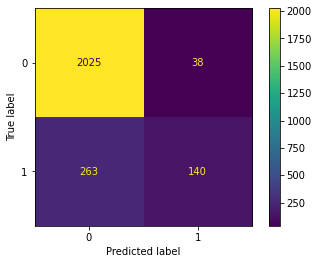

[[2025   38]
 [ 263  140]]


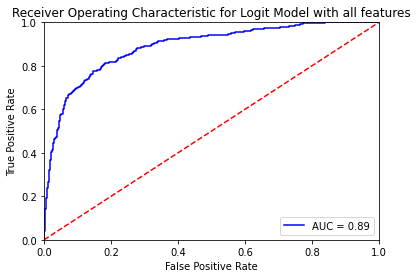

           0                     vars
7  -4.106023                ExitRates
6  -2.815743              BounceRates
9  -1.107603               SpecialDay
15 -0.258064              VisitorType
11 -0.085285         OperatingSystems
13 -0.021452                   Region
0  -0.009447           Administrative
1   0.000033  Administrative_Duration
5   0.000120  ProductRelated_Duration
3   0.000258   Informational_Duration
4   0.002850           ProductRelated
14  0.005729              TrafficType
2   0.029275            Informational
12  0.029985                  Browser
8   0.079171               PageValues
10  0.110320                    Month
16  0.144359                  Weekend


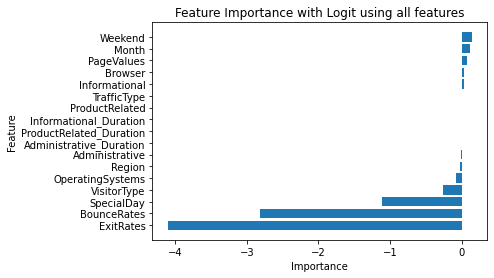

In [22]:
#Logistic Regression With all available features
in_vars=list(shopper)[0:17] 
# Split into train and test
np.random.seed(121)
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#logistic reg model
logit = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
# Predict 
y_train_pred=logit.predict(x_train)
y_pred=logit.predict(x_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(logit, x_test, y_test)   
plt.show() 

print(confusion_matrix(y_test,y_pred))
y_probas=logit.predict_proba(x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC 
plt.title('Receiver Operating Characteristic for Logit Model with all features')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
imp['vars']=in_vars
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Logit using all features')
plt.show()

 

#### Logit Model with filtered features 

Training Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.93      9123
           1       0.36      0.74      0.49       737

    accuracy                           0.88      9860
   macro avg       0.67      0.82      0.71      9860
weighted avg       0.93      0.88      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2291
           1       0.34      0.78      0.47       175

    accuracy                           0.88      2466
   macro avg       0.66      0.83      0.70      2466
weighted avg       0.94      0.88      0.90      2466

0.8302999314086176


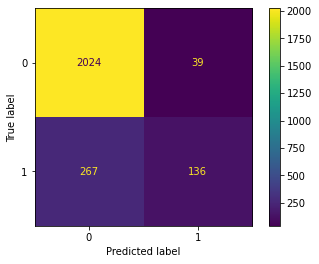

[[2024   39]
 [ 267  136]]


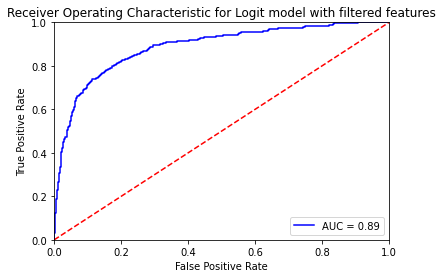

          0                     vars
3 -5.618804                ExitRates
8 -0.278564              VisitorType
7 -0.022964                   Region
0 -0.001439           Administrative
2  0.000182  ProductRelated_Duration
6  0.022829                  Browser
1  0.048169            Informational
4  0.079331               PageValues
5  0.108891                    Month
9  0.151471                  Weekend


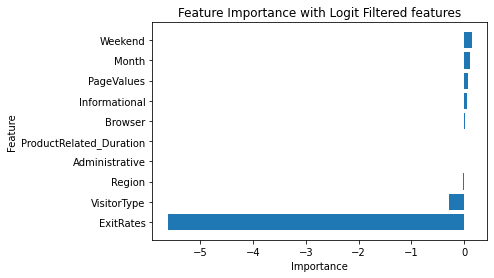

In [23]:
#Logit Model with filtered features 
in_vars=['Administrative', 'Informational','ProductRelated_Duration','ExitRates', 'PageValues','Month', 'Browser', 'Region','VisitorType', 'Weekend']
# Split into train and test
np.random.seed(121)
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#logistic reg model
logit = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

# Predict 
y_train_pred=logit.predict(x_train)
y_pred=logit.predict(x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(logit, x_test, y_test)  # doctest: +SKIP
plt.show() 
print(confusion_matrix(y_test,y_pred))
y_probas=logit.predict_proba(x_test)
preds = y_probas[:,1]
fpr, tpr, threshold =roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Logit model with filtered features')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
imp['vars']=in_vars
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Logit Filtered features')
plt.show()

#### Logit model with  RFE selected features

Training Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9152
           1       0.35      0.75      0.48       708

    accuracy                           0.88      9860
   macro avg       0.67      0.82      0.71      9860
weighted avg       0.93      0.88      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      2294
           1       0.35      0.83      0.49       172

    accuracy                           0.88      2466
   macro avg       0.67      0.86      0.71      2466
weighted avg       0.94      0.88      0.90      2466

0.8559031649804343


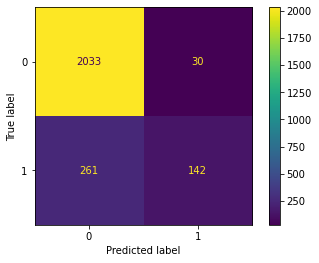

[[ 0.02941879  0.10810072 -6.35037309  0.0782438   0.11637472  0.02459028
  -0.19008172  0.13064075]]
0.43907144275309185


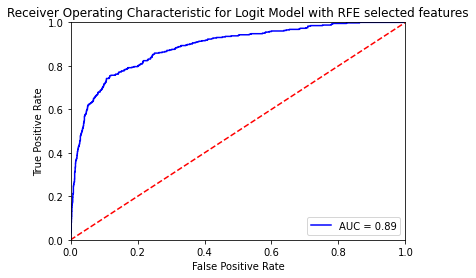

          0            vars
2 -6.350373       ExitRates
6 -0.190082     VisitorType
5  0.024590         Browser
0  0.029419  Administrative
3  0.078244      PageValues
1  0.108101   Informational
4  0.116375           Month
7  0.130641         Weekend


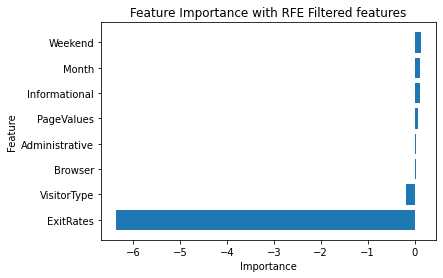

In [24]:
# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#logistic reg model

rfe_selector = RFE(logit,n_features_to_select=8)
rfe_x_train = rfe_selector.fit_transform(x_train,y_train)
logit = LogisticRegression(solver='liblinear', random_state=0).fit(rfe_x_train, y_train)
y_train_pred=logit.predict(rfe_x_train)
rfe_x_test = rfe_selector.transform(x_test)
y_pred=logit.predict(rfe_x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(logit, rfe_x_test, y_test)   
plt.show() 
print(logit.coef_)
print(cohen_kappa_score(y_test,y_pred))

y_probas=logit.predict_proba(rfe_x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Logit Model with RFE selected features')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
temp = pd.Series(rfe_selector.support_,index = in_vars)
imp['vars']=temp[temp==True].index
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with RFE Filtered features')
plt.show()

#### Logit Model with Stepwise step forward features

Training Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9160
           1       0.35      0.76      0.48       700

    accuracy                           0.88      9860
   macro avg       0.67      0.83      0.71      9860
weighted avg       0.94      0.88      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2303
           1       0.33      0.82      0.47       163

    accuracy                           0.88      2466
   macro avg       0.66      0.85      0.70      2466
weighted avg       0.94      0.88      0.90      2466

0.8526408605473256


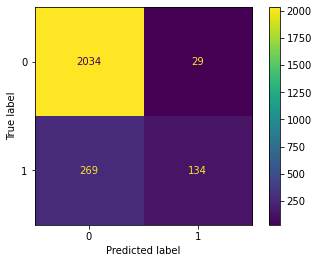

0.41879089955693627


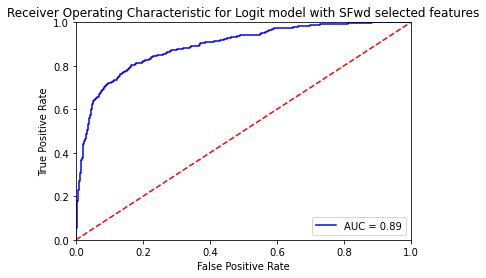

          0                     vars
2 -5.916773                ExitRates
1 -3.169490              BounceRates
8 -0.144648              VisitorType
4 -0.077886         OperatingSystems
6 -0.029499                   Region
0  0.000596  Administrative_Duration
7  0.004365              TrafficType
5  0.021826                  Browser
3  0.078276               PageValues
9  0.167769                  Weekend


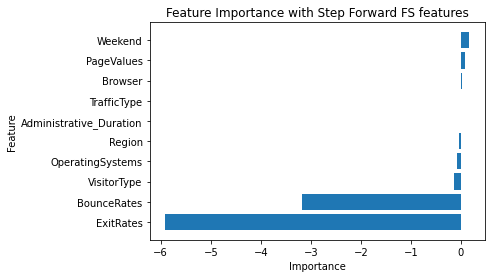

In [28]:
# Split into train and test
step_fwd_vars=list(shopper.iloc[:,[1, 6, 7, 8, 11, 12, 13, 14, 15, 16]])
in_vars=step_fwd_vars
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
sfs_x_train=x_train 
sfs_x_test=x_test 
logit = LogisticRegression(solver='liblinear', random_state=0).fit(sfs_x_train, y_train)
y_train_pred=logit.predict(sfs_x_train)
y_pred=logit.predict(sfs_x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(logit, sfs_x_test, y_test)   
plt.show() 
print(cohen_kappa_score(y_test,y_pred))
y_probas=logit.predict_proba(sfs_x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic for Logit model with SFwd selected features')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Feature importance
imp=pd.DataFrame(data=logit.coef_)
imp=imp.transpose()
imp['vars']=step_fwd_vars
imp=imp.sort_values(by=[0])
print(imp)
plt.barh(imp['vars'],imp[0],align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Step Forward FS features')
plt.show()

Training Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9116
           1       0.36      0.73      0.48       744

    accuracy                           0.88      9860
   macro avg       0.67      0.81      0.71      9860
weighted avg       0.93      0.88      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2305
           1       0.31      0.78      0.45       161

    accuracy                           0.87      2466
   macro avg       0.65      0.83      0.69      2466
weighted avg       0.94      0.87      0.90      2466

0.8312175799302084


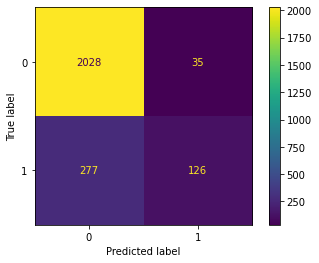

[[2028   35]
 [ 277  126]]


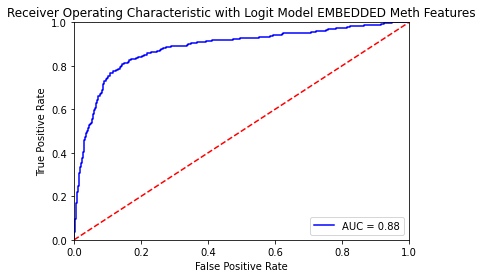

In [30]:
#USING ATTRIBUTES FROM Embedded method
in_vars=["Administrative_Duration","Informational_Duration","ProductRelated","ProductRelated_Duration","PageValues"]
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
logit = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
y_train_pred=logit.predict(x_train)
y_pred=logit.predict(x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(logit,x_test, y_test)   
plt.show() 
print(confusion_matrix(y_test,y_pred))
y_probas=logit.predict_proba(x_test)
preds = y_probas[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

 
plt.title('Receiver Operating Characteristic with Logit Model EMBEDDED Meth Features')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## SVM 

#### SVM using features selected using RFE Method 

Training Data
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8674
           1       0.54      0.69      0.61      1186

    accuracy                           0.89      9860
   macro avg       0.75      0.80      0.77      9860
weighted avg       0.91      0.89      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2179
           1       0.54      0.76      0.63       287

    accuracy                           0.90      2466
   macro avg       0.75      0.84      0.78      2466
weighted avg       0.92      0.90      0.90      2466

0.8353686519884933


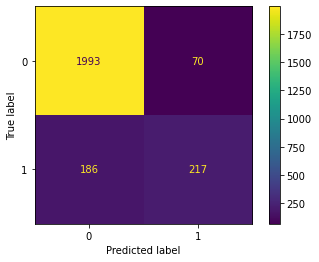

0.570610616928918


In [34]:
from sklearn.svm import SVC # "Support vector classifier"
# Split into train and test
in_vars=['ExitRates','BounceRates','SpecialDay','VisitorType','PageValues','Weekend','Month','Informational']
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#SVM model
svc_model=SVC(kernel='rbf').fit(x_train,y_train)
y_train_pred=svc_model.predict(x_train)
y_pred=svc_model.predict(x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(svc_model,x_test, y_test)   
plt.show() 
print(cohen_kappa_score(y_test,y_pred))

#### SVM using features selected using Step Forward Method 

Training Data
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      9058
           1       0.40      0.75      0.52       802

    accuracy                           0.89      9860
   macro avg       0.69      0.82      0.73      9860
weighted avg       0.93      0.89      0.90      9860

Test Data
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2276
           1       0.37      0.78      0.50       190

    accuracy                           0.88      2466
   macro avg       0.67      0.83      0.72      2466
weighted avg       0.93      0.88      0.90      2466

0.8334543520488391


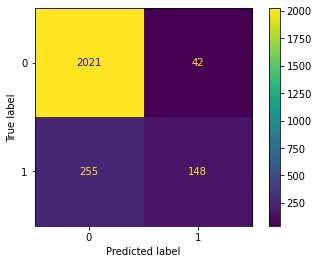

0.4405720143171622


In [35]:
# Split into train and test
in_vars=step_fwd_vars
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#SVM model
svc_model=SVC(kernel='rbf').fit(x_train,y_train)
y_train_pred=svc_model.predict(x_train)
y_pred=svc_model.predict(x_test)
#logit.score(x_test, y_test)
print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(svc_model,x_test, y_test)   
plt.show() 
print(cohen_kappa_score(y_test,y_pred))

## kNN Classifier 

#### kNN using features selected using RFE Method 

Training Data
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8572
           1       0.62      0.73      0.67      1288

    accuracy                           0.91      9860
   macro avg       0.79      0.83      0.81      9860
weighted avg       0.91      0.91      0.91      9860

Test Data
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2154
           1       0.55      0.71      0.62       312

    accuracy                           0.89      2466
   macro avg       0.75      0.81      0.78      2466
weighted avg       0.91      0.89      0.90      2466

0.8137543746875223


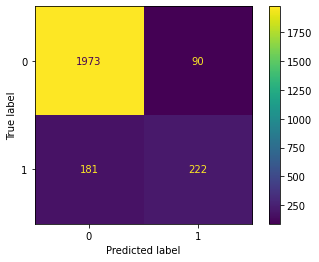

0.5579294550967839


In [36]:
from sklearn.neighbors import KNeighborsClassifier
in_vars=['ExitRates','BounceRates','SpecialDay','VisitorType','PageValues','Weekend','Month','Informational']
#x_train, x_test, y_train, y_test = train_test_split(shopper_norm[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#kNN model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_train_pred=knn_model.predict(x_train)
y_pred=knn_model.predict(x_test)

print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(knn_model, x_test, y_test)   
plt.show() 
 
print(cohen_kappa_score(y_test,y_pred))

#### kNN using features selected using Step Forward Method 

Training Data
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8735
           1       0.56      0.75      0.65      1125

    accuracy                           0.91      9860
   macro avg       0.77      0.84      0.80      9860
weighted avg       0.92      0.91      0.91      9860

Test Data
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2202
           1       0.46      0.70      0.55       264

    accuracy                           0.88      2466
   macro avg       0.71      0.80      0.74      2466
weighted avg       0.91      0.88      0.89      2466

0.8008783337461811


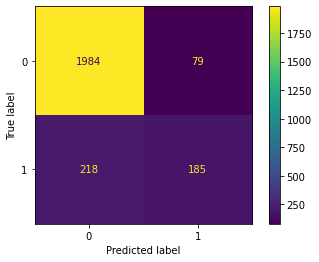

[[1984   79]
 [ 218  185]]
0.4885596611263109


In [37]:
from sklearn.neighbors import KNeighborsClassifier
in_vars=step_fwd_vars
x_train, x_test, y_train, y_test = train_test_split(shopper[in_vars], shopper['Revenue'], test_size=0.2, random_state=0)
#knn model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_train_pred=knn_model.predict(x_train)
y_pred=knn_model.predict(x_test)

print("Training Data")
print(classification_report(y_train_pred, y_train))
print("Test Data")
print(classification_report(y_pred, y_test))
print(balanced_accuracy_score(y_pred, y_test))
plot_confusion_matrix(knn_model, x_test, y_test)   
plt.show() 
print(confusion_matrix(y_test,y_pred))
print(cohen_kappa_score(y_pred,y_test))

### Data Models Evaluation 
**Three Classifiers are built and tested to predict the intention of the customer to male a purchase. The Models are built with predictors from RFE Feature and Step Forward Selection. The models used are**

            1. Logistic Regression 
            2. Support Vector Machine
            3. kNN Classifier 
|Classifier                   | Accuracy   | Balanced Accuracy| Precision| Recall  |F1-score| Kappa|
|-----------------------------|------------|------------------|----------|---------|--------|------|    
|Logistic Regression(RFE)     | 88         |85.52             |67        |    86   |0.71    |  0.44|  
|Logistic Regression(SFwd)    | 88         |85.26             |66        |    85   |0.70    |  0.42|  
|SVM(RFE)                     | 90         |83.53             |75        |    84   |0.78    |  0.57|  
|SVM(SFwd)                    | 88         |83.35             |67        |    83   |0.72    |  0.44|  
|kNN(RFE)                     | 89         |81.75             |76        |    82   |0.79    |  0.56|  
|kNN(SFwd)                    | 88         |80.09             |71        |    80   |0.74    |  0.49| 